### `cenpy` Practice
After discussions with a colleague, reading the Census developers Slack, and some other light reading, it appears that using `cenpy` to grab data and produce visualizations may be the best way (that I know of) to extract and use Milwaukee-related Census data. I am using this notebook to play around with its functionality before starting to develop code & requests.

In [23]:
# Import statements
import cenpy
import pandas as pd
import geopandas as gpd
import numpy as np
import scipy.stats as stats
import sys
import os
import osmnx
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Okay, it looks like we have the Census data necessary for using `cenpy` are installed. Let's see what packages are available through `cenpy`.

In [24]:
dir(cp)

['SITEKEY',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_load_sitekey',
 'base',
 'explorer',
 'geoparser',
 'remote',
 'tiger',
 'tools']

Looks like the main objects we will use are:

* `base`
* `explorer`
* `geoparser`
* `remote`
* `tiger`
* `tools`

Let's take a look at which packages are available within these attributes

In [25]:
print("***cp.base attributes***\n")
print(dir(cp.base))

***cp.base attributes***

['Connection', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__']


In [26]:
print("***cp.explorer attributes***\n")
print(dir(cp.explorer))

***cp.explorer attributes***

['APIs', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_delist', '_parse_results_table_from_response', 'available', 'diter', 'explain', 'fips_table', 'fp', 'os', 'pd', 'r', 'raw_APIs', 'six', 'unicode']


In [27]:
print("***cp.geoparser attributes***\n")
print(dir(cp.geoparser))

***cp.geoparser attributes***

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_get_polygon_type', '_is_cw', '_parse_clockwise_sequence', 'convert_geometries', 'esriGeometryPoint', 'esriGeometryPolyLine', 'esriGeometryPolygon', 'esriMultiPoint', 'fix_rings', 'np', 'parse_polygon_to_pysal', 'parse_polygon_to_shapely', 'pd']


In [28]:
print("***cp.remote attributes***\n")
print(dir(cp.remote))

***cp.remote attributes***

['APIConnection', 'JSONDecodeError', 'PY3', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'exp', 'iteritems', 'math', 'np', 'pd', 'r', 'tig', 'unicode']


In [29]:
print("***cp.tiger attributes***\n")
print(dir(cp.tiger))

***cp.tiger attributes***

['ESRILayer', 'FTPConnection', 'TigerConnection', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_basequery', '_baseurl', '_bcs', '_jget', '_pcs', 'available', 'copy', 'diter', 'gpsr', 'pd', 'r']


In [30]:
print("***cp.tools attributes***\n")
print(dir(cp.tools))

***cp.tools attributes***

['HTTPError', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_ft', '_load_sitekey', '_state_fipscodes', 'county_to_block', 'gencounty_to_block', 'genstate_to_block', 'genstate_to_blockgroup', 'genstate_to_tract', 'national_to_block', 'national_to_blockgroup', 'national_to_tract', 'os', 'pd', 'set_sitekey', 'state_to_block', 'state_to_blockgroup', 'state_to_tract', 'time', 'tqdm', 'warn']


With the exception, of `cenpy.base`, it looks like the main attributes we will use are the ones listed above as suspected. We are missing `products.py` though, which is problematic. We are going to try to get some Milwaukee data now.

In [37]:
help(cp.remote.APIConnection)

Help on class APIConnection in module cenpy.remote:

class APIConnection(builtins.object)
 |  APIConnection(api_name=None, apikey='')
 |  
 |  Methods defined here:
 |  
 |  __init__(self, api_name=None, apikey='')
 |      Constructor for a Connection object
 |      
 |      Parameters
 |      ============
 |      api_name : shortcode identifying which api to connect to
 |      
 |      Returns
 |      ========
 |      
 |      a Cenpy Connection object
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  explain(self, *args, **kwargs)
 |      Explain a column or list of columns.
 |      
 |      Parameters
 |      ============
 |      *args : list of names of columns in the variables dataframe that require
 |              explanation"
 |      verbose : boolean denoting whether to grab both "label" and "concept"
 |              from the variable dataframe.
 |      
 |      Returns
 |      ==========
 |      dictionary of explanatory texts about variables inputted.
 |  
 |  query

Create a connection to the 2019 CBP API

In [39]:
cbp_conn = cp.remote.APIConnection("CBP2019")

Create a table of variables from 2019 CBP

In [41]:
cbp_conn.variables

,label,concept,predicateType,group,limit,predicateOnly,attributes,required,values
for,Census API FIPS 'for' clause,Census API Geography Specification,fips-for,N/A,0,True,NaN,NaN,NaN
in,Census API FIPS 'in' clause,Census API Geography Specification,fips-in,N/A,0,True,NaN,NaN,NaN
ucgid,Uniform Census Geography Identifier clause,Census API Geography Specification,ucgid,N/A,0,True,NaN,NaN,NaN
EMP_N,Noise range for number of employees,"All Sectors: County Business Patterns, includi...",int,CB1900CBP,0,NaN,EMP_N_F,NaN,NaN
STATE,Geography,NaN,NaN,N/A,0,NaN,NaN,NaN,NaN
PAYQTR1_N,Noise range for first-quarter payroll,"All Sectors: County Business Patterns, includi...",int,CB1900CBP,0,NaN,PAYQTR1_N_F,NaN,NaN
CSA,Geography,NaN,NaN,N/A,0,NaN,NaN,NaN,NaN
GEOCOMP,GEO_ID Component,NaN,string,N/A,0,NaN,NaN,default displayed,NaN
NATION,Geography,NaN,NaN,N/A,0,NaN,NaN,NaN,NaN
LFO,Legal form of organization code,"All Sectors: County Business Patterns, includi...",string,CB1900CBP,0,NaN,LFO_LABEL,default displayed,"{'item': {'001': 'All establishments', '901': ..."


Show the required predicates by filtering the variables DataFrame by the required field. If required fields are not entered into a query, the query **will fail** if these queries are not passed as keyword arguments. They don't have to specify a a signle value, though, so they can be left as a wild card (use `*`).

In [42]:
cbp_conn.variables[~ cbp_conn.variables.required.isnull()]

,label,concept,predicateType,group,limit,predicateOnly,attributes,required,values
GEOCOMP,GEO_ID Component,NaN,string,N/A,0,NaN,NaN,default displayed,NaN
LFO,Legal form of organization code,"All Sectors: County Business Patterns, includi...",string,CB1900CBP,0,NaN,LFO_LABEL,default displayed,"{'item': {'001': 'All establishments', '901': ..."
NAICS2017,2017 NAICS code,"All Sectors: County Business Patterns, includi...",string,CB1900CBP,0,NaN,"NAICS2017_F,NAICS2017_LABEL,NAICS2017_F",default displayed,"{'item': {'00': 'Total for all sectors', '0000..."
EMPSZES,Employment size of establishments code,"All Sectors: County Business Patterns, includi...",string,CB1900CBP,0,NaN,EMPSZES_LABEL,default displayed,"{'item': {'001': 'All establishments', '204': ..."


Geographies are shown within a given hierarchy. The only geography is the `fips` geography.

In [43]:
cbp_conn.geographies.keys()

dict_keys(['fips'])

Print the geography levels available for 2019 CBP:

In [44]:
cbp_conn.geographies["fips"]

,name,geoLevelDisplay,referenceDate,requires,wildcard,optionalWithWCFor
0,us,010,2017-01-01,NaN,NaN,NaN
1,state,040,2017-01-01,NaN,NaN,NaN
2,county,050,2017-01-01,[state],[state],state
3,metropolitan statistical area/micropolitan sta...,310,2017-01-01,NaN,NaN,NaN
4,combined statistical area,330,2017-01-01,NaN,NaN,NaN
5,congressional district,500,2017-01-01,[state],[state],state
6,zip code,861,2017-01-01,NaN,NaN,NaN


Try to get ZIP code level data from the new API connection opened in this notebook.

*Note: Idk if ZBP is available through `cenpy` at the moment.

Try getting county-level data for Wisconsin.

In [66]:
wi_cbp_19 = cbp_conn.query(cols=["NAME", "NAICS2017", "EMP", "ESTAB", "PAYANN", "PAYQTR1"], geo_unit="county:*", geo_filter={'state': '55'})

In [67]:
wi_cbp_19

,NAME,NAICS2017,EMP,ESTAB,PAYANN,PAYQTR1,state,county
0,"Iron County, Wisconsin",00,1380,191,41498,8794,55,051
1,"Iron County, Wisconsin",11,15,6,404,99,55,051
2,"Iron County, Wisconsin",113,15,6,404,99,55,051
3,"Iron County, Wisconsin",1133,15,6,404,99,55,051
4,"Iron County, Wisconsin",11331,15,6,404,99,55,051
...,...,...,...,...,...,...,...,...
30212,"Kenosha County, Wisconsin",81391,6,3,257,59,55,059
30213,"Kenosha County, Wisconsin",813910,6,3,257,59,55,059
30214,"Kenosha County, Wisconsin",81393,43,6,397,99,55,059
30215,"Kenosha County, Wisconsin",813930,43,6,397,99,55,059


We need to grab geodata at the county level for Wisconsin.

In [64]:
cbp_conn.set_mapservice("State_County")

How many layers are available through the Census's MapService?

In [65]:
len(cbp_conn.mapservice.layers)

71

That is a lot of layers, We could check what the interface looks like by retrieving URLs of most objects:

In [68]:
cbp_conn.mapservice._baseurl

'http://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/State_County/MapServer'

Pull the Wisconsin counties layer from our mapservice connection:

In [72]:
wi_cty_geo = cbp_conn.mapservice.query(layer=1, where="STATE = 55")
# view columns
wi_cty_geo.head()

/Users/edebroux/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,MTFCC,OID,GEOID,STATE,COUNTY,COUNTYNS,BASENAME,NAME,LSADC,FUNCSTAT,COUNTYCC,AREALAND,AREAWATER,OBJECTID,CENTLAT,CENTLON,INTPTLAT,INTPTLON,geometry
0,G4020,27590451104831,55111,55,111,01581115,Sauk,Sauk County,06,A,H1,2153686013,45692969,17,+43.4265204,-089.9482217,+43.4280010,-089.9433184,"POLYGON ((-10000753.142 5343368.137, -10000849..."
1,G4020,27590235652898,55093,55,093,01581107,Pierce,Pierce County,06,A,H1,1486700521,48452323,146,+44.7194087,-092.4223648,+44.7253365,-092.4262793,"POLYGON ((-10283128.723 5599869.584, -10282428..."
2,G4020,27590695004695,55063,55,063,01581091,La Crosse,La Crosse County,06,A,H1,1170175008,73150469,156,+43.9064775,-091.1151639,+43.9082222,-091.1117584,"POLYGON ((-10153657.364 5475807.618, -10153567..."
3,G4020,27590240238595,55033,55,033,01581076,Dunn,Dunn County,06,A,H1,2201902840,35572613,162,+44.9462773,-091.8963779,+44.9477513,-091.8976451,"POLYGON ((-10231552.287 5654398.059, -10231237..."
4,G4020,27590453995255,55053,55,053,01581086,Jackson,Jackson County,06,A,H1,2558687755,32538316,172,+44.3191910,-090.8049791,+44.3245897,-090.7995104,"POLYGON ((-10118138.877 5489995.828, -10118218..."


Beware of that depreciation warning...

Let's combine this CBP data from the 2019 CBP API query & the MapService query:

In [71]:
wi_cbp_geo = pd.merge(wi_cbp_19, wi_cty_geo, left_on="county", right_on="COUNTY")
# Check the first 5 rows of the new DataFrame
wi_cbp_geo.head()

,NAME_x,NAICS2017,EMP,ESTAB,PAYANN,PAYQTR1,state,county,MTFCC,OID,...,FUNCSTAT,COUNTYCC,AREALAND,AREAWATER,OBJECTID,CENTLAT,CENTLON,INTPTLAT,INTPTLON,geometry
0,"Iron County, Wisconsin",00,1380,191,41498,8794,55,051,G4020,27590647877274,...,A,H1,1963751254,416872439,1753,+46.3164361,-090.2636657,+46.3265500,-090.2612985,"POLYGON ((-10039687.913 5854093.754, -10039647..."
1,"Iron County, Wisconsin",11,15,6,404,99,55,051,G4020,27590647877274,...,A,H1,1963751254,416872439,1753,+46.3164361,-090.2636657,+46.3265500,-090.2612985,"POLYGON ((-10039687.913 5854093.754, -10039647..."
2,"Iron County, Wisconsin",113,15,6,404,99,55,051,G4020,27590647877274,...,A,H1,1963751254,416872439,1753,+46.3164361,-090.2636657,+46.3265500,-090.2612985,"POLYGON ((-10039687.913 5854093.754, -10039647..."
3,"Iron County, Wisconsin",1133,15,6,404,99,55,051,G4020,27590647877274,...,A,H1,1963751254,416872439,1753,+46.3164361,-090.2636657,+46.3265500,-090.2612985,"POLYGON ((-10039687.913 5854093.754, -10039647..."
4,"Iron County, Wisconsin",11331,15,6,404,99,55,051,G4020,27590647877274,...,A,H1,1963751254,416872439,1753,+46.3164361,-090.2636657,+46.3265500,-090.2612985,"POLYGON ((-10039687.913 5854093.754, -10039647..."


Let's try to make a Wisconsin CBP map

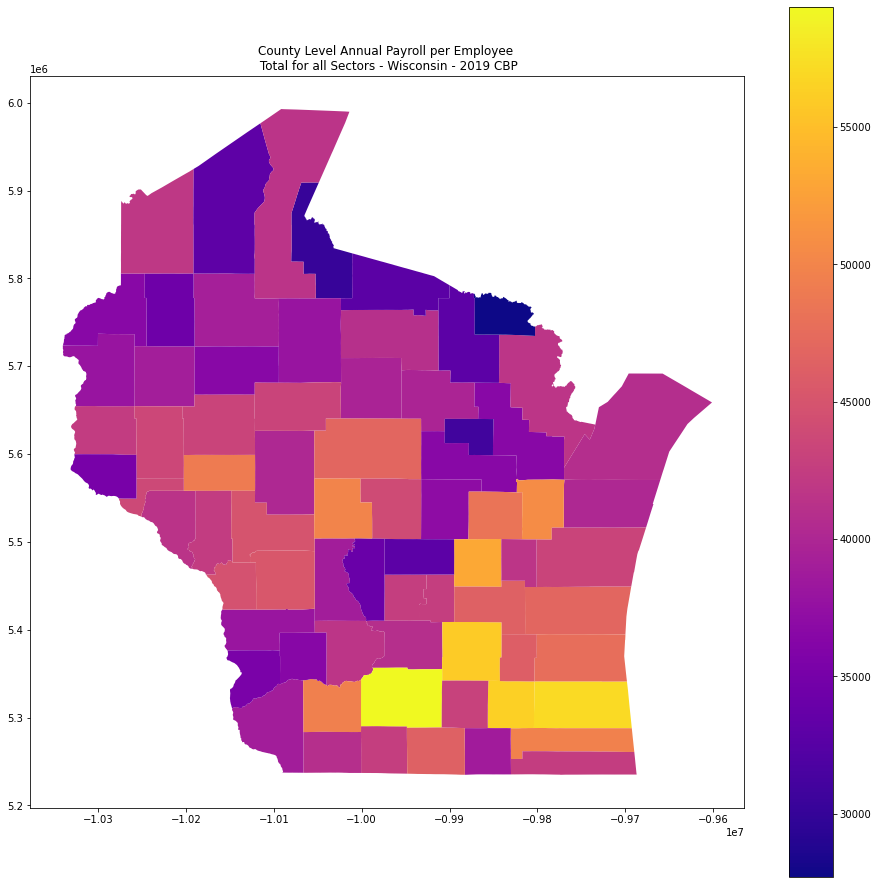

In [86]:
fig, ax = plt.subplots(figsize=(16,16))
wi_data = gpd.GeoDataFrame(wi_cbp_geo[["NAME_x", "NAICS2017", "EMP", "ESTAB", "PAYANN", "PAYQTR1", "geometry"]])
wi_data["EMP"] = wi_data["EMP"].astype(np.int64); wi_data["PAYANN"] = wi_data["PAYANN"].astype(np.int64)
wi_data["AP_PER_EMP"] = wi_data["PAYANN"] / wi_data["EMP"] * 1000.
wi_data["AP_PER_EMP"] = wi_data["AP_PER_EMP"].round(decimals=0)
wi_data[wi_data.NAICS2017=="00"].plot(ax=ax, legend=True, column = "AP_PER_EMP", cmap="plasma")
ax.set_title("County Level Annual Payroll per Employee \n Total for all Sectors - Wisconsin - 2019 CBP")
plt.show()

In [84]:
type(wi_data)

pandas.core.frame.DataFrame